In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns #基於matplotlib的高階繪圖工具
from pylab import rcParams #指定圖片像素
import matplotlib.pyplot as plt
from matplotlib import rc
sns.set(style='whitegrid', palette='muted', font_scale=1.5) #palette='muted'指定中性的顏色
rcParams['figure.figsize'] = 16*2, 10*2

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
time = np.arange(0, 100, 0.1) #產生0~100每一格0.1的數值
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time)) #scale=0.5分布機率的標準差，也就是分布的寬度

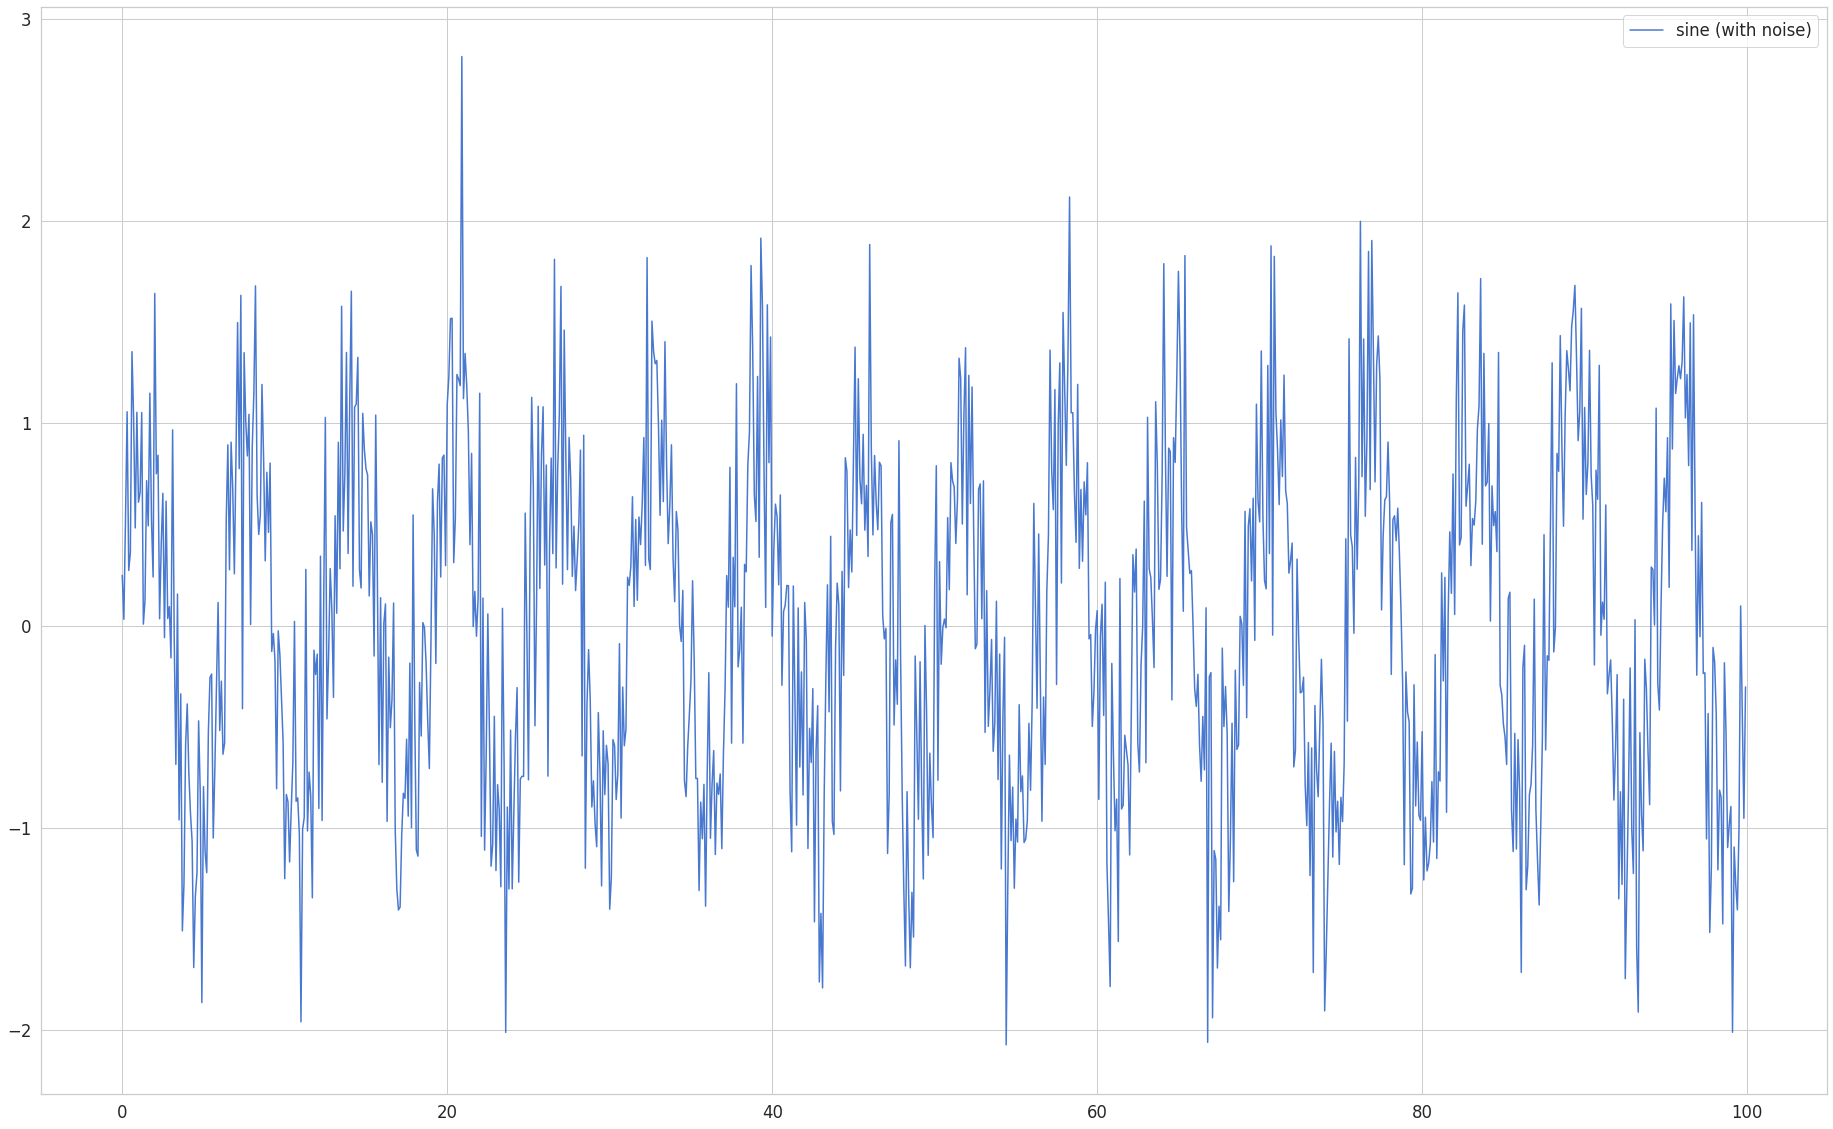

In [ ]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

#Data Preprocessing

In [ ]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps): #取得X的差異數據
        v = X.iloc[i:(i + time_steps)].values #依據time_steps切等份
        Xs.append(v)#合併數據       
        ys.append(y.iloc[i + time_steps]) #切出y的數據
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10
X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790, 1)


In [ ]:
X_train.shape[1], X_train.shape[2]

(10, 1)

#Modeling

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())

#Training

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=10, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
72/72 [==============================] - 2s 8ms/step - loss: 0.4829 - val_loss: 0.3538
Epoch 2/30
72/72 [==============================] - 0s 3ms/step - loss: 0.3092 - val_loss: 0.3284
Epoch 3/30
72/72 [==============================] - 0s 3ms/step - loss: 0.3030 - val_loss: 0.3235
Epoch 4/30
72/72 [==============================] - 0s 4ms/step - loss: 0.3017 - val_loss: 0.3202
Epoch 5/30
72/72 [==============================] - 0s 3ms/step - loss: 0.3008 - val_loss: 0.3179
Epoch 6/30
72/72 [==============================] - 0s 4ms/step - loss: 0.3001 - val_loss: 0.3162
Epoch 7/30
72/72 [==============================] - 0s 3ms/step - loss: 0.2996 - val_loss: 0.3148
Epoch 8/30
72/72 [==============================] - 0s 3ms/step - loss: 0.2990 - val_loss: 0.3136
Epoch 9/30
72/72 [==============================] - 0s 3ms/step - loss: 0.2985 - val_loss: 0.3125
Epoch 10/30
72/72 [==============================] - 0s 3ms/step - loss: 0.2978 - val_loss: 0.3114
Epoch 11/30
72/72 [

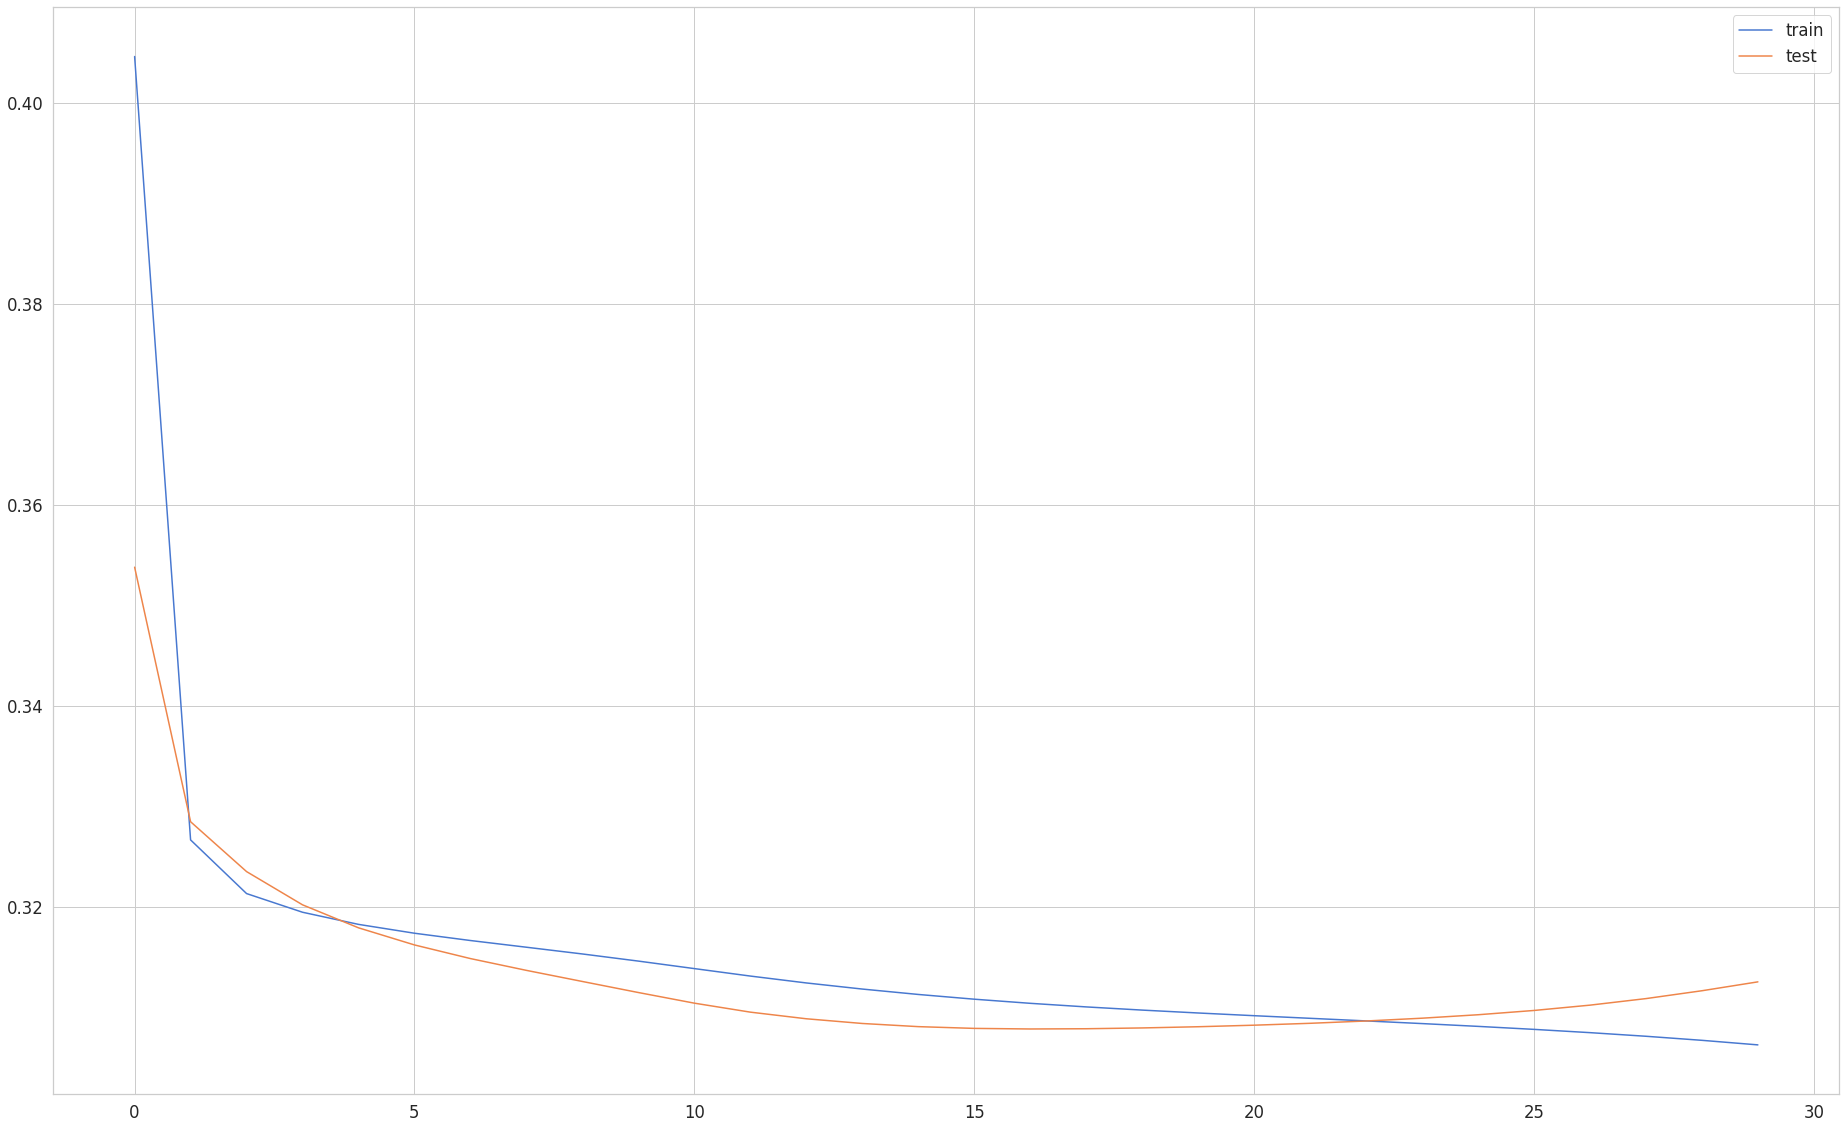

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)

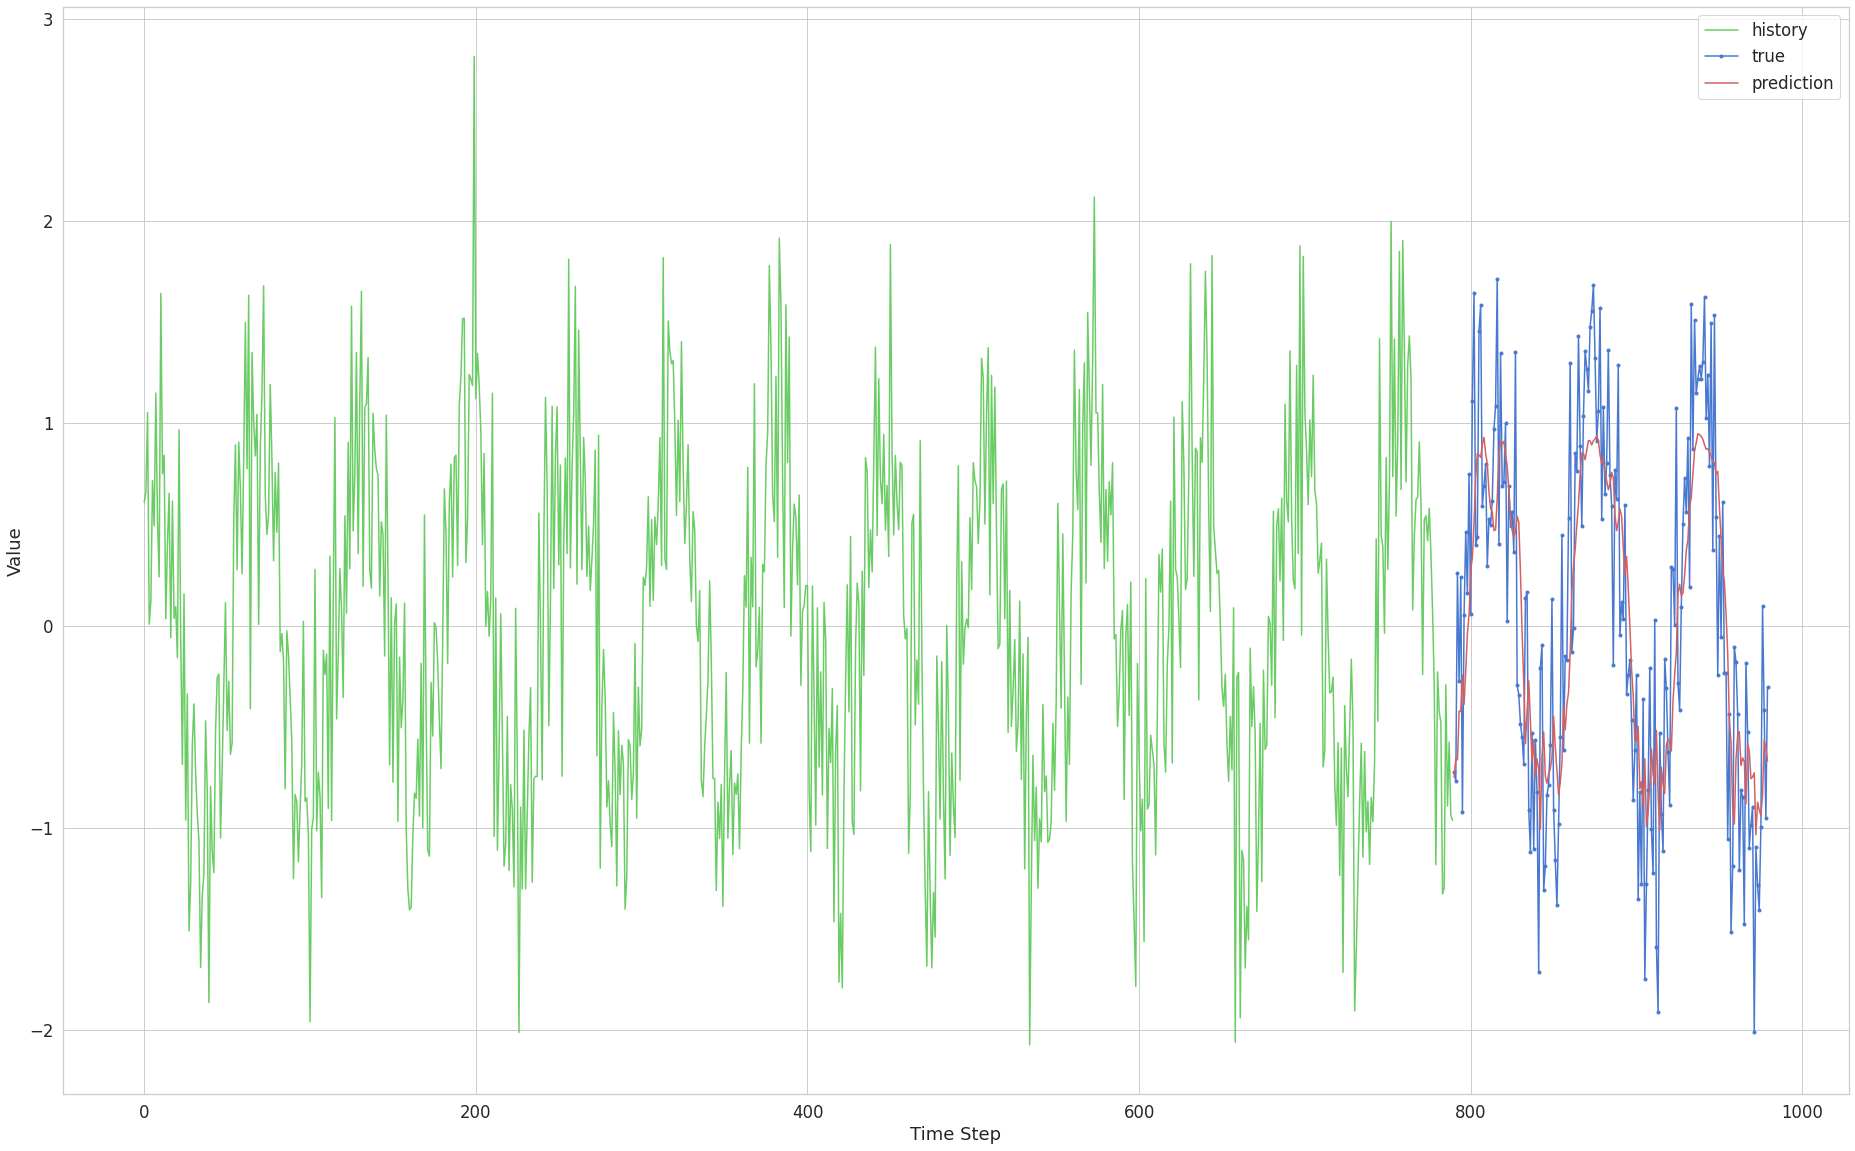

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

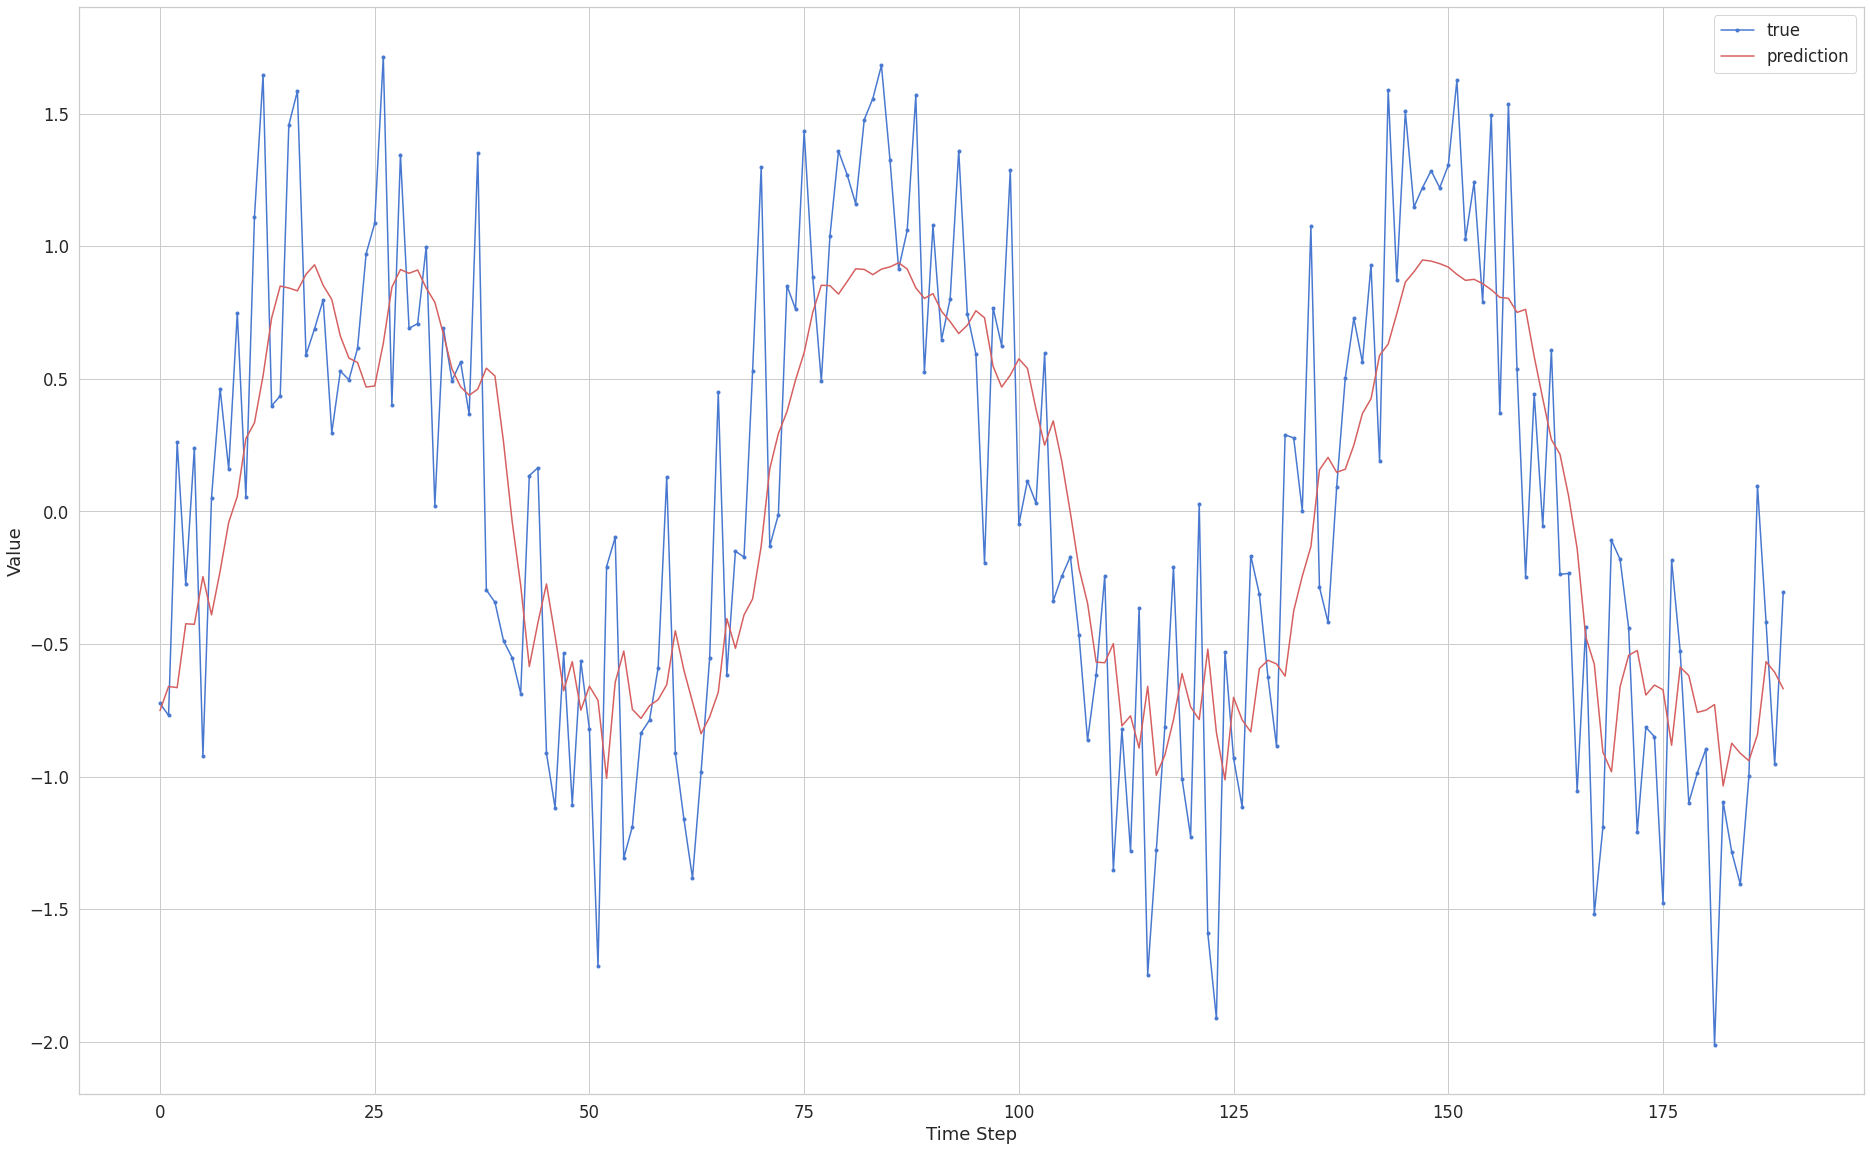

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();